## Question 1: Role of Variables

There are several predictor variables in the dataset and some of them are more important than others and have a higher chance and impact of influencing good and bad credit risk. A persons *job* is a very important factor in determining the loans from banks and plays a huge role in determining whether the person is a good risk or bad risk because a person with a good job can repay the loans while a person with a poor job will most likely not be able to do it. Furthermore, the *purpose* for loan is also very important in determining whether the person is serious or not and whether the purpose is strong and eligible for a loan. Similarly there are several other variabls like *personal status*, *sex*, *employment period*, *age*, *housing*, etc which influences the loan prediction. No surprises in the dataset so far.

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [394]:
df = pd.read_csv('german.csv')

In [395]:
df

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,0,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,0,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,1,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [396]:
df=pd.read_csv("german.data", sep=" ", header=None)

In [397]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [398]:
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Cost Matrix(Risk)"]
df.columns=headers
df.to_csv("german_data_credit_cat.csv",index=False) #save as csv file

#for structuring only
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)



Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)




Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)




Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)



risk={1:"Good Risk", 2:"Bad Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

In [399]:
# Checking 5 dandom samples from the dataset
df.sample(5)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
684,0 <= <200 DM,36,delay in paying off,business,9857,100 <= <500 DM,4<= <7 years,1,male:single,none,3,savings agreement/life insurance,31,none,own,2,unskilled - resident,2,yes,yes,Good Risk
686,>= 200 DM,10,critical account,radio/television,1347,no savings account,4<= <7 years,4,male:single,none,2,savings agreement/life insurance,27,none,own,2,skilled employee / official,1,yes,yes,Good Risk
400,no checking account,18,existing credits paid back duly till now,radio/television,1473,<100 DM,<1 years,3,male:married/widowed,none,4,real estate,39,none,own,1,skilled employee / official,1,yes,yes,Good Risk
205,<0 DM,30,critical account,car (used),10623,<100 DM,>=7 years,3,male:single,none,4,unknown / no property,38,none,for free,3,management/ highly qualified employee,2,yes,yes,Good Risk
243,no checking account,12,critical account,business,1185,<100 DM,1<= < 4 years,3,female:divorced/separated/married,none,2,real estate,27,none,own,2,skilled employee / official,1,none,yes,Good Risk


In [400]:
df.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.90,3271.26,2.97,2.85,35.55,1.41,1.16
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [402]:
df.isnull().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [403]:
df.isna().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [404]:
def visualize_distribution(attr):
    good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
    bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_good_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_bad_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

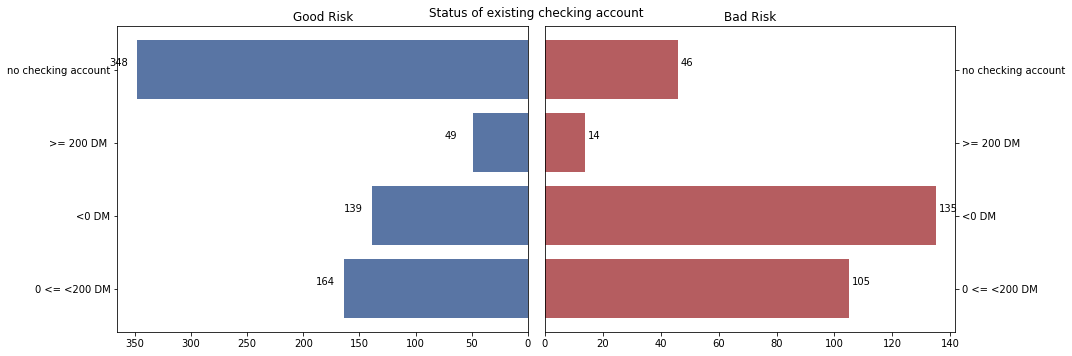

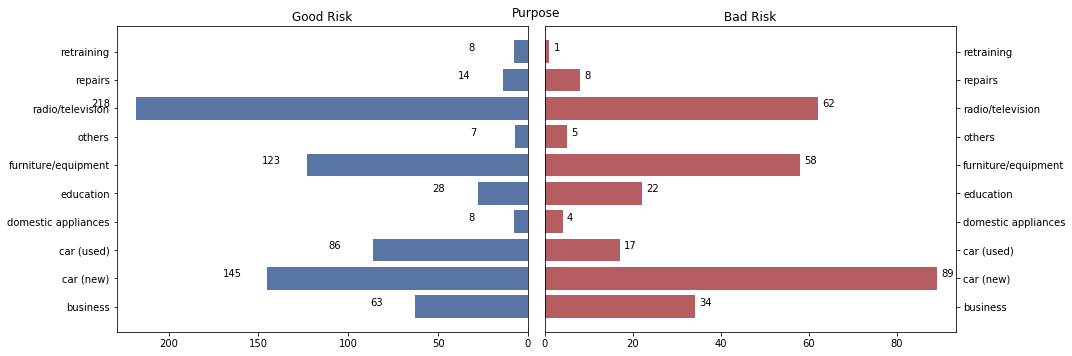

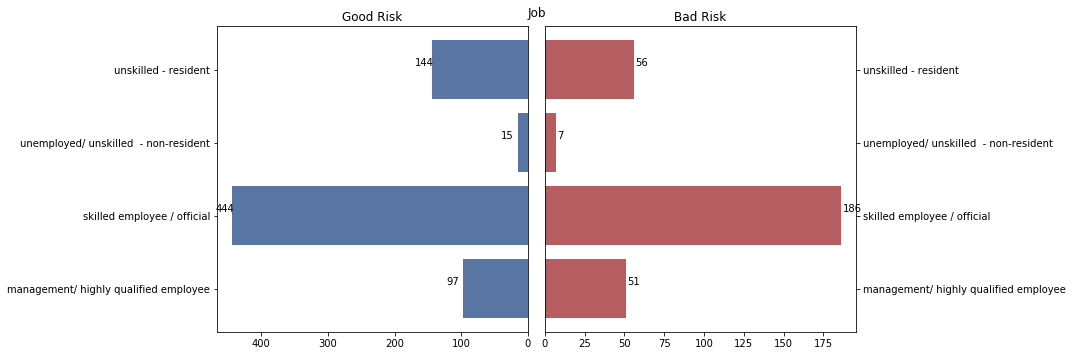

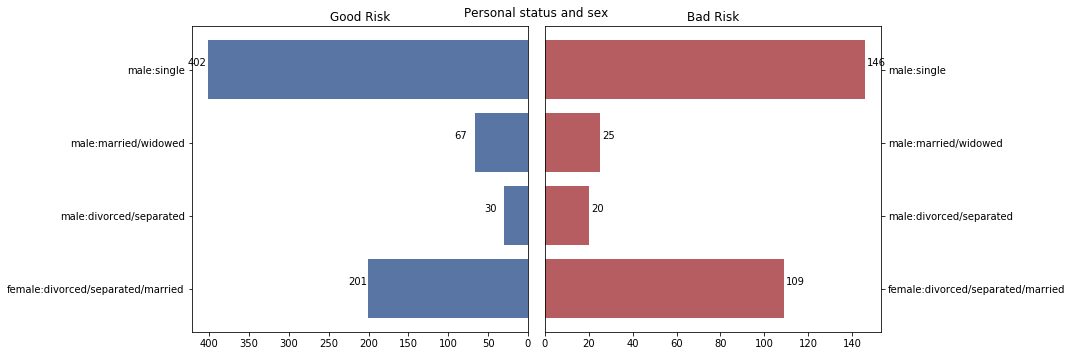

In [405]:
visualize_distribution("Status of existing checking account")
print('\n')
visualize_distribution("Purpose")
print('\n')
visualize_distribution("Job")
print('\n')
visualize_distribution("Personal status and sex")

In [406]:
col_cat_names=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker"]
for attr in col_cat_names:
    df = df.merge(pd.get_dummies(df[attr], prefix=attr), left_index=True, right_index=True)
    df.drop(attr,axis=1,inplace=True)
 
#converting target variable into numeric
risk={"Good Risk":1, "Bad Risk":0}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

In [407]:
df.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Other debtors / guarantors,Present residence since,Age in years,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Cost Matrix(Risk),Status of existing checking account_0 <= <200 DM,Status of existing checking account_<0 DM,Status of existing checking account_>= 200 DM,Status of existing checking account_no checking account,Credit history_all credits at this bank paid back duly,Credit history_critical account,Credit history_delay in paying off,Credit history_existing credits paid back duly till now,Credit history_no credits taken,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/television,Purpose_repairs,Purpose_retraining,Savings account/bonds_100 <= <500 DM,Savings account/bonds_500 <= < 1000 DM,Savings account/bonds_<100 DM,Savings account/bonds_>= 1000 DM,Savings account/bonds_no savings account,Present employment since_1<= < 4 years,Present employment since_4<= <7 years,Present employment since_<1 years,Present employment since_>=7 years,Present employment since_unemployed,Personal status and sex_female:divorced/separated/married,Personal status and sex_male:divorced/separated,Personal status and sex_male:married/widowed,Personal status and sex_male:single,Property_car or other,Property_real estate,Property_savings agreement/life insurance,Property_unknown / no property,Other installment plans_bank,Other installment plans_none,Other installment plans_store,Housing_for free,Housing_own,Housing_rent,foreign worker_no,foreign worker_yes
0,6,1169,4,none,4,67,2,skilled employee / official,1,yes,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
1,48,5951,2,none,2,22,1,skilled employee / official,1,none,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,12,2096,2,none,3,49,1,unskilled - resident,2,none,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
3,42,7882,2,guarantor,4,45,1,skilled employee / official,2,none,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
4,24,4870,3,none,4,53,2,skilled employee / official,2,none,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1


### Loading the numeric model for predictions for customers for loan

In [408]:
df_new = pd.read_csv('german.data-numeric', header=None, delim_whitespace=True)

In [409]:
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,3,1,1,1,1,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,3,1,1,2,1,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,3,1,1,1,1,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,3,1,1,2,1,0,0,1,0,0,0,0,0,1,2


*risk={1:"Good Risk", 2:"Bad Risk"}*

### Feature Selection and splitting data into train, test using 60/40 split

In [410]:
Y = df_new[24]
X = df_new.drop(columns = 24)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4, random_state = 1)

## Logistic Regression

Accuracy:   76.2


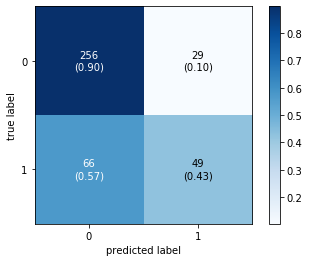

In [411]:
model = LogisticRegression().fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("Accuracy:   %0.1f" % (score*100))


# Plotting graph
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show();

Benefit of a True Positive = +x dollars

Benefit of a True Negative = +x dollars since they don't qualify for the loan

Cost of a False Positive = -x dollars

Cost of a False Negative = -5x dollars

In [412]:
# COST BENEFIT MATRIX
# 1:5 Ratio of FP : FN
# the costs of a false positive
# (incorrectly saying an applicant is a good credit risk) outweigh the cost of a false negative (incorrectly
# saying an applicant is a bad credit risk) by a factor of five.

cm = metrics.confusion_matrix(y_test, prediction)
FP = cm[0][1]
FN = cm[1][0]
print(cm)
#Net_Profit = FP - (FN*5)

Total_Net_Profit = cm[0][0] + (-FP) + (-5*FN) + cm[1][1]


if Total_Net_Profit > 0:
    print('\nIt is a Profitable prediction')
else:
    print('\nIt is a Loss prediction of $', Total_Net_Profit)

[[256  29]
 [ 66  49]]

It is a Loss prediction of $ -54


## Decision Tree Classifier

Accuracy:   76.2 %


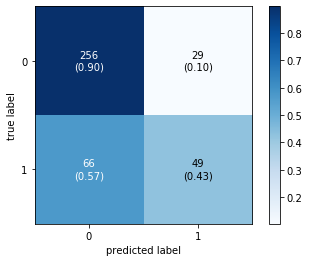

    feature  importance
0         0        0.11
1         1        0.10
2         2        0.06
3         3        0.17
4         4        0.04
5         5        0.04
6         6        0.06
7         7        0.02
8         8        0.04
9         9        0.14
10       10        0.02
11       11        0.02
12       12        0.01
13       13        0.01
14       14        0.00
15       15        0.03
16       16        0.03
17       17        0.06
18       18        0.00
19       19        0.02
20       20        0.01
21       21        0.00
22       22        0.01
23       23        0.02


In [381]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt.fit(x_train,y_train)
y_pred  = dt.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("Accuracy:   %0.1f" % (score*100) + ' %')

# Plotting graph
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show();

cnf_matrix = confusion_matrix(y_test, y_pred)
featureimp  = pd.DataFrame({'feature': x_train.columns, 'importance': dt.feature_importances_})
print(featureimp)

In [382]:
# COST BENEFIT MATRIX
# 1:5 Ratio of FP : FN
# the costs of a false positive
# (incorrectly saying an applicant is a good credit risk) outweigh the cost of a false negative (incorrectly
# saying an applicant is a bad credit risk) by a factor of five.

cm = metrics.confusion_matrix(y_test, prediction)
FP = cm[0][1]
FN = cm[1][0]
print(cm)
#Net_Profit = FP - (FN*5)

Total_Net_Profit = cm[0][0] + (-FP) + (-5*FN) + cm[1][1]


if Total_Net_Profit > 0:
    print('\nIt is a Profitable prediction')
else:
    print('\nIt is a Loss prediction of $', Total_Net_Profit)

[[256  29]
 [ 66  49]]

It is a Loss prediction of $ -54


## Neural Network Classifier [Multi-layer Perceptron classifier]

Accuracy:   78.2 %


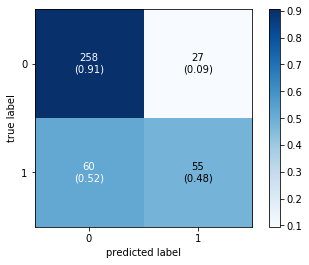

In [383]:
model = MLPClassifier(random_state=1).fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("Accuracy:   %0.1f" % (score*100) + ' %')

# Plotting graph
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show();

In [384]:
# COST BENEFIT MATRIX
# 1:5 Ratio of FP : FN
# the costs of a false positive
# (incorrectly saying an applicant is a good credit risk) outweigh the cost of a false negative (incorrectly
# saying an applicant is a bad credit risk) by a factor of five.

cm = metrics.confusion_matrix(y_test, prediction)
FP = cm[0][1]
FN = cm[1][0]
print(cm)
#Net_Profit = FP - (FN*5)

Total_Net_Profit = cm[0][0] + (-FP) + (-5*FN) + cm[1][1]


if Total_Net_Profit > 0:
    print('\nIt is a Profitable prediction')
else:
    print('\nIt is a Loss prediction of $', Total_Net_Profit)

[[258  27]
 [ 60  55]]

It is a Loss prediction of $ -14


## Naive Bayes Gaussian Classifier

Accuracy:   71.5


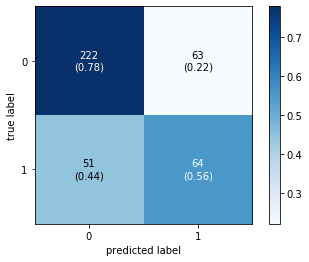

In [385]:
# takes 5-10 minutes
model = GaussianNB().fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("Accuracy:   %0.1f" % (score*100))


# Plotting graph
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show();

In [386]:
# COST BENEFIT MATRIX
# 1:5 Ratio of FP : FN
# the costs of a false positive
# (incorrectly saying an applicant is a good credit risk) outweigh the cost of a false negative (incorrectly
# saying an applicant is a bad credit risk) by a factor of five.

cm = metrics.confusion_matrix(y_test, prediction)
FP = cm[0][1]
FN = cm[1][0]
print(cm)
#Net_Profit = FP - (FN*5)

Total_Net_Profit = cm[0][0] + (-FP) + (-5*FN) + cm[1][1]


if Total_Net_Profit > 0:
    print('\nIt is a Profitable prediction')
else:
    print('\nIt is a Loss prediction of $', Total_Net_Profit)

[[222  63]
 [ 51  64]]

It is a Loss prediction of $ -32


## Random Forest Classifier [Classification Tree]

Accuracy:   76.2


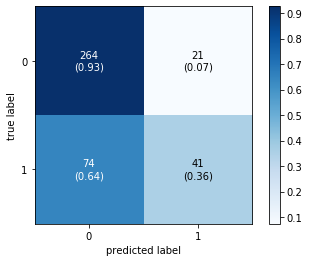

In [387]:
model = RandomForestClassifier(criterion='gini', random_state=1).fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("Accuracy:   %0.1f" % (score*100))


# Plotting graph
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show();

In [388]:
# COST BENEFIT MATRIX
# 1:5 Ratio of FP : FN
# the costs of a false positive
# (incorrectly saying an applicant is a good credit risk) outweigh the cost of a false negative (incorrectly
# saying an applicant is a bad credit risk) by a factor of five.

cm = metrics.confusion_matrix(y_test, prediction)
FP = cm[0][1]
FN = cm[1][0]
print(cm)
#Net_Profit = FP - (FN*5)

Total_Net_Profit = cm[0][0] + (-FP) + (-5*FN) + cm[1][1]


if Total_Net_Profit > 0:
    print('\nIt is a Profitable prediction')
else:
    print('\nIt is a Loss prediction of $', Total_Net_Profit)

[[264  21]
 [ 74  41]]

It is a Loss prediction of $ -86


## Linear Discriminant Analysis Classifier

Accuracy:   75.8


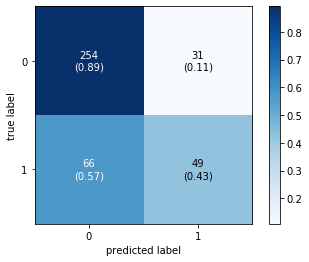

In [389]:
model = LinearDiscriminantAnalysis(solver = 'eigen').fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("Accuracy:   %0.1f" % (score*100))


# Plotting graph
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show();

In [390]:
# COST BENEFIT MATRIX
# 1:5 Ratio of FP : FN
# the costs of a false positive
# (incorrectly saying an applicant is a good credit risk) outweigh the cost of a false negative (incorrectly
# saying an applicant is a bad credit risk) by a factor of five.

cm = metrics.confusion_matrix(y_test, prediction)
FP = cm[0][1]
FN = cm[1][0]
print(cm)
#Net_Profit = FP - (FN*5)

Total_Net_Profit = cm[0][0] + (-FP) + (-5*FN) + cm[1][1]


if Total_Net_Profit > 0:
    print('\nIt is a Profitable prediction')
else:
    print('\nIt is a Loss prediction of $', Total_Net_Profit)

[[254  31]
 [ 66  49]]

It is a Loss prediction of $ -58


### Checking to see whether any other ML model can outperform the existing classifiers listed in the question

In [272]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=2)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.50it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.72               0.73     0.73      0.73   
LogisticRegression                 0.76               0.68     0.68      0.74   
AdaBoostClassifier                 0.75               0.68     0.68      0.74   
LinearDiscriminantAnalysis         0.75               0.67     0.67      0.74   
PassiveAggressiveClassifier        0.69               0.67     0.67      0.70   
LGBMClassifier                     0.74               0.67     0.67      0.74   
LinearSVC                          0.75               0.67     0.67      0.74   
XGBClassifier                      0.74               0.67     0.67      0.73   
RidgeClassifierCV                  0.76               0.67     0.67      0.74   
CalibratedClassifierCV             0.77               0.67     0.67      0.75   
GaussianNB                  